# Keras

Keras es una biblioteca para manipular redes neuronales. Es una capa de alto nivel por arriba de Theano (o de TensorFlow).

## Ejemplo simple

Construcción de una red neuronal:

In [1]:
%matplotlib inline
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()
model.add(Dense(output_dim=2, input_dim=5, activation="sigmoid"))
model.add(Dense(output_dim=1, activation="sigmoid"))

Using Theano backend.


Podemos ver una descripción del modelo:

In [2]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 2)             12          dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             3           dense_1[0][0]                    
Total params: 15
____________________________________________________________________________________________________


Así como también podemos visualizarlo:

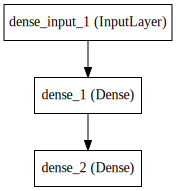

In [3]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Luego hay que compilar:

In [4]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Usamos un conjunto de datos de ejemplo:

In [5]:
import numpy as np

def dataset(n_train, n_test):
    n = n_train + n_test
    points = np.random.uniform(-3, 3, [n, 2])
    features = np.c_[points, points[:, 0]**2, points[:, 1]**2, points[:, 0] * points[:, 1]]
    labels = (np.linalg.norm(points, axis=1) > 2).astype(int)
    return (features[:n_train], labels[:n_train]), (features[n_train:], labels[n_train:])

(X_train, y_train), (X_test, y_test) = dataset(8000, 2000)

Entrenamos la red:

In [6]:
model.fit(X_train, y_train, nb_epoch=50, batch_size=32)

Epoch 1/50
8000/8000 [==============================] - 0s - loss: 0.6074 - acc: 0.6592     
Epoch 2/50
8000/8000 [==============================] - 0s - loss: 0.5950 - acc: 0.6592     
Epoch 3/50
8000/8000 [==============================] - 0s - loss: 0.5846 - acc: 0.6592     
Epoch 4/50
8000/8000 [==============================] - 0s - loss: 0.5753 - acc: 0.6592     
Epoch 5/50
8000/8000 [==============================] - 0s - loss: 0.5659 - acc: 0.6592     
Epoch 6/50
8000/8000 [==============================] - 0s - loss: 0.5558 - acc: 0.6592     
Epoch 7/50
8000/8000 [==============================] - 0s - loss: 0.5448 - acc: 0.6592     
Epoch 8/50
8000/8000 [==============================] - 0s - loss: 0.5328 - acc: 0.6592     
Epoch 9/50
8000/8000 [==============================] - 0s - loss: 0.5198 - acc: 0.6601     
Epoch 10/50
8000/8000 [==============================] - 0s - loss: 0.5057 - acc: 0.6834     
Epoch 11/50
8000/8000 [==============================] - 0s - loss: 0

Podemos evaluar y ver métricas:

In [7]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print()
print()
print('Valor de la función de costo: {}'.format(loss_and_metrics[0]))
print('Acierto: {}'.format(loss_and_metrics[1]))

1760/2000 [=========================>....] - ETA: 0s

Valor de la función de costo: 0.13138423991203307
Acierto: 0.977


Y también podemos ver las clases predecidas y sus probablidades:

In [8]:
y_pred = model.predict_classes(X_test)
probability = model.predict_proba(X_test)

print(y_pred)
print(probability)

1696/2000 [========================>.....] - ETA: 0s[[0]
 [1]
 [0]
 ..., 
 [0]
 [1]
 [1]]
[[ 0.06571954]
 [ 0.97925889]
 [ 0.18408181]
 ..., 
 [ 0.06201001]
 [ 0.9259845 ]
 [ 0.97212315]]


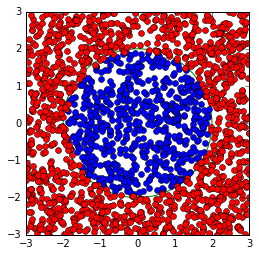

In [9]:
import matplotlib.pyplot as plt

def plot(inside, outside):
    if inside.any():
        plt.plot(inside[:, 0], inside[:, 1], 'bo')
    if outside.any():
        plt.plot(outside[:, 0], outside[:, 1], 'ro')
    circle = plt.Circle((0, 0), radius=2, color='g', fill=False)
    ax = plt.gca()
    ax.set_aspect(1)
    ax.add_patch(circle)
    plt.show()

points_test = X_test[:, :2]

inside = np.array([x for x, y in zip(points_test, y_pred) if y == 0])
outside = np.array([x for x, y in zip(points_test, y_pred) if y == 1])

plot(inside, outside)

## Funciones de costo disponibles

* mean_squared_error
* mean_absolute_error
* mean_absolute_percentage_error
* mean_squared_logarithmic_error
* squared_hinge
* hinge
* binary_crossentropy
* categorical_crossentropy
* sparse_categorical_crossentropy
* kullback_leibler_divergence
* poisson
* cosine_proximity

## Optimizadores disponibles

* SGD
* RMSprop
* Adagrad
* Adadelta
* Adam
* Adamax
* Nadam

También se puede instanciar "manualmente" el optimizador para ajustar parámetros como la constante de aprendizaje, el momento y la desaceleración de la constante de aprendizaje:

In [10]:
from keras.optimizers import SGD

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, decay=0.001), metrics=['accuracy'])

## Funciones de activación disponibles

* softmax
* softplus
* softsign
* relu
* tanh
* sigmoid
* hard_sigmoid
* linear

## Compatibilidad con scikit-learn

Keras provee una API para usar los modelos como si fueran parte de scikit-learn:

In [11]:
from keras.wrappers import scikit_learn
from sklearn import cross_validation

classifier = scikit_learn.KerasClassifier(build_fn=lambda: model, nb_epoch=5)
# build_fn debe devolver un modelo compilado.

classifier.fit(X_train, y_train)

kfold = cross_validation.StratifiedKFold(y=y_train, n_folds=3, shuffle=True)
results = cross_validation.cross_val_score(classifier, X_train, y_train, cv=kfold)
print()
print()
print('Acierto: {}'.format(results.mean()))

Epoch 1/5
8000/8000 [==============================] - 0s - loss: 0.1168 - acc: 0.9836     
Epoch 2/5
8000/8000 [==============================] - 0s - loss: 0.1020 - acc: 0.9870     
Epoch 3/5
8000/8000 [==============================] - 0s - loss: 0.0927 - acc: 0.9890     
Epoch 4/5
8000/8000 [==============================] - 0s - loss: 0.0864 - acc: 0.9905     
Epoch 5/5
8000/8000 [==============================] - 0s - loss: 0.0817 - acc: 0.9918     
Epoch 1/5
5333/5333 [==============================] - 0s - loss: 0.0786 - acc: 0.9891     
Epoch 2/5
5333/5333 [==============================] - 0s - loss: 0.0767 - acc: 0.9936     
Epoch 3/5
5333/5333 [==============================] - 0s - loss: 0.0747 - acc: 0.9921     
Epoch 4/5
5333/5333 [==============================] - 0s - loss: 0.0730 - acc: 0.9927     
Epoch 5/5
5333/5333 [==============================] - 0s - loss: 0.0697 - acc: 0.9944     
Epoch 2/5
5333/5333 [==============================] - 0s - loss: 0.0684 - acc: 

También está disponible la clase `KerasRegressor`. Con esto se pueden hacer cosas como usar `GridSearchCV` para buscar la combinación de parámetros que mejoran los resultados (valores de la constante de aprendizaje, momento, etc), así como también construir un pipeline en donde el modelo puede tomar datos a partir de otros modelos de scikit-learn.

## Ejemplo de análisis de sentimientos de comentarios de IMDb

Este es un ejemplo en el que se usa Keras, aprovechando a mostrar más funcionalidades:

In [12]:
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import Convolution1D, MaxPooling1D
from keras.datasets import imdb


# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
filter_length = 5
nb_filter = 64
pool_length = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
nb_epoch = 2

print('Cargando datos...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (ejemplos x tiempo)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Construyendo el modelo...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
model.add(MaxPooling1D(pool_length=pool_length))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Entrenando...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Valor de la función de costo:', score)
print('Acierto:', acc)

Cargando datos...
20000 train sequences
5000 test sequences
Pad sequences (ejemplos x tiempo)
X_train shape: (20000, 100)
X_test shape: (5000, 100)
Construyendo el modelo...
Entrenando...
Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 151s - loss: 0.4298 - acc: 0.7888 - val_loss: 0.3346 - val_acc: 0.8492
Epoch 2/2
5000/5000 [==============================] - 11s    
Valor de la función de costo: 0.338069551766
Acierto: 0.850399994493


Desafortunadamente los datos de este ejemplo tienen solamente los índices de las palabras, así que no podemos probar el modelo con texto.

## Capas disponibles

Hay muchas capas disponibles. Se destacan:

* `Dense`
* `Activation`
* `Merge`: permite combinar varias capas ya sea concatenándolas, sumándolas, etc.
* `Reshape`
* `Permute`
* `RepeatVector`
* Convolutivas
* Recurrentes
* `Embedding`: TODO
* `BatchNormalization`: para dejar la norma de los vectores cercana a 0 y con desviación estándar cercana a 1.
* Aquellas que agregan ruido con el objetivo de no sobreajustar.
    * `Dropout`: TODO
    * `GaussianNoise`: TODO
    * `GaussianDropout`: TODO

## Hay más

Hay más cosas que se vieron poco acá pero que vale la pena mencionar que existen:

* Usar TensorFlow en lugar de Theano como backend.
* Aceleración de cálculos utiilizando la GPU.

## Referencias

* [Documentación de Keras](https://keras.io/).
* 